# Regresie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from math import sqrt

Vom folosi setul de date [California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), care este prezent in mod direct pe instantele de Google Colab (acesta poate fi gasit de asemenea si in libraria scikit-learn).

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Fetch the California housing dataset
california_housing = fetch_california_housing()

# Convert to a Pandas DataFrame
df_california_housing = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
df_california_housing['MedHouseVal'] = california_housing.target

# Split the DataFrame into train and test subsets (2/3 train, 1/3 test)
train_data, test_data = train_test_split(df_california_housing, test_size=1/3, shuffle=True, random_state=42)

# Save the train and test data to CSV files
train_data.to_csv('california_housing_train.csv', index=False)
test_data.to_csv('california_housing_test.csv', index=False)

# Display the first few rows of the training data
train_data.head()

# Display the first few rows of the testing data
test_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   

       Longitude  MedHouseVal  
20046    -119.01      0.47700  
3024     -119.46      0.45800  
15663    -122.44      5.00001  
20484    -118.72      2.18600  
9814     -121.93      2.78000

Ne folosim de functia `describe` din Pandas pentru a obtine cateva statistici utile.

Observati ca setul de date nu are valori lipsa (randul `count` ne arata ca pentru fiecare variabila / coloana in parte avem `17000` de intrari in tabel).

In [5]:
train_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  13760.000000  13760.000000  13760.000000  13760.000000  13760.000000   
mean       3.876893     28.556613      5.437425      1.097646   1430.401163   
std        1.902318     12.596969      2.453851      0.446709   1146.579463   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.568925     18.000000      4.460779      1.006590    792.000000   
50%        3.538250     29.000000      5.233021      1.049440   1170.000000   
75%        4.756900     37.000000      6.058824      1.100268   1729.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  13760.000000  13760.000000  13760.000000  13760.000000  
mean       3.129588     35.651514   -119.585585      2.066645  
std       12.677206      2.134250      2.005402      1.153657  
min        0.692308     32.550000   -124.350000      0.149990  
25%        2.432051     33.940000   -121.810000      1.194000  
50%        2.820179     34.270000   -118.510000      1.792000  
75%        3.282093     37.720000   -118.010000      2.641000  
max     1243.333333     41.950000   -114.310000      5.000010

Plotam un heatmap pentru corelatiile dintre variabile. Observati ca exista o corelatie destul de puternica intre variabila de input `median_income` si variabila de output (target-ul nostru) `median_house_value`.

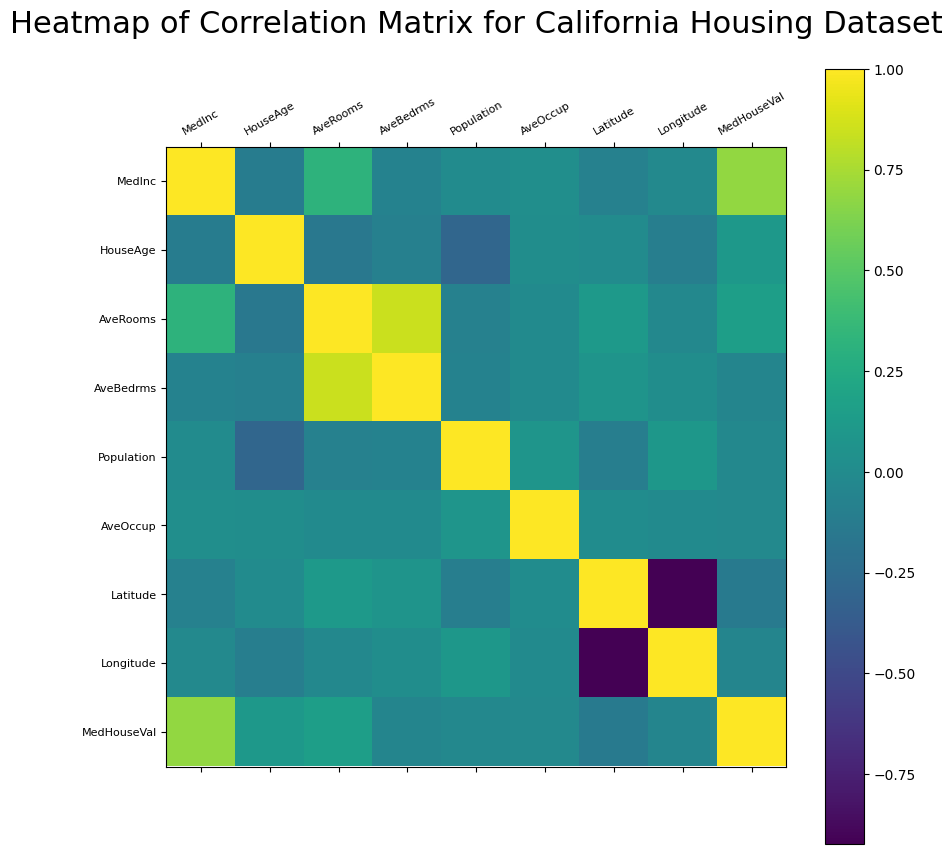

In [6]:
plt.matshow(train_data.corr())
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=8, rotation=30)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=8)
plt.colorbar()
plt.title('Heatmap of Correlation Matrix for California Housing Dataset', y=1.17, fontsize=22)
plt.show()

Impartim acum DataFrame-urile de train si test in DataFrame-uri care sa contina separat variabilele de input si variabila de output.

In [7]:
x_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:, -1]

x_test = test_data.iloc[:, 0:-1]
y_test = test_data.iloc[:, -1]

Functia `.head()` din Pandas printeaza primele 5 randuri din tabel. Similar, functia `.tail()` le printeaza pe ultimele 5.

In [8]:
x_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7321  1.6341      38.0  3.355482   1.046512      1157.0  3.843854     33.99   
1459  5.2442      26.0  6.367442   0.995349      1316.0  3.060465     37.97   
7386  1.9041      30.0  4.497382   1.157068       912.0  4.774869     33.96   
8582  7.9059      38.0  6.547945   1.063927      1098.0  2.506849     33.90   
5358  3.6953      34.0  4.891204   1.062500       859.0  1.988426     34.05   

      Longitude  
7321    -118.18  
1459    -121.98  
7386    -118.24  
8582    -118.40  
5358    -118.40

Plotam acum histograme pentru variabila de output pentru a putea vizualiza direct cam care este distributia preturilor locuintelor din dataset-ul nostru.

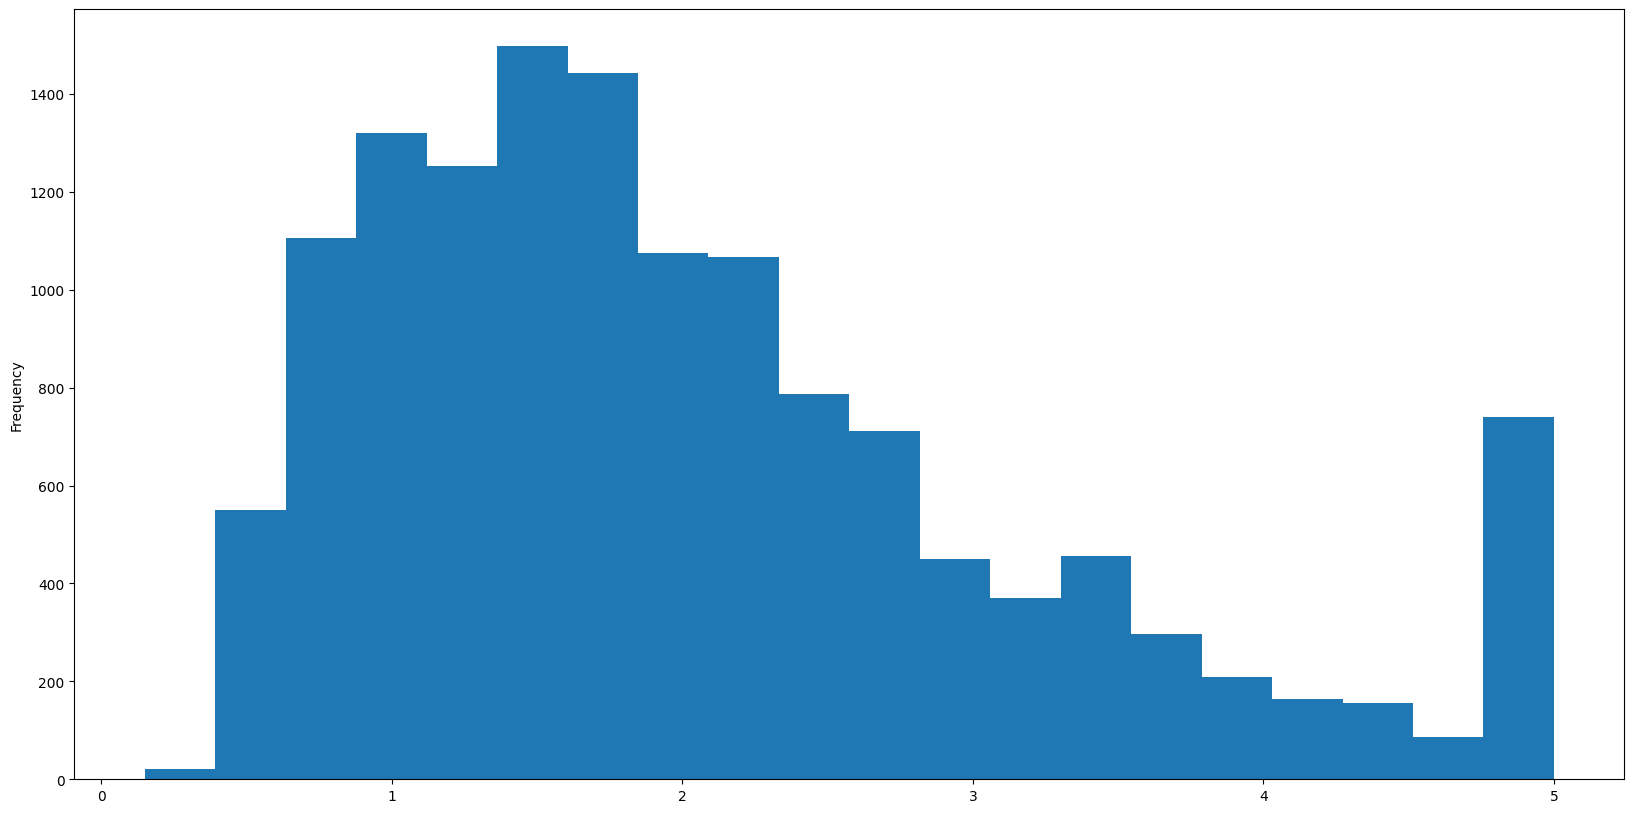

In [9]:
y_train.plot.hist(bins=20)
plt.show()

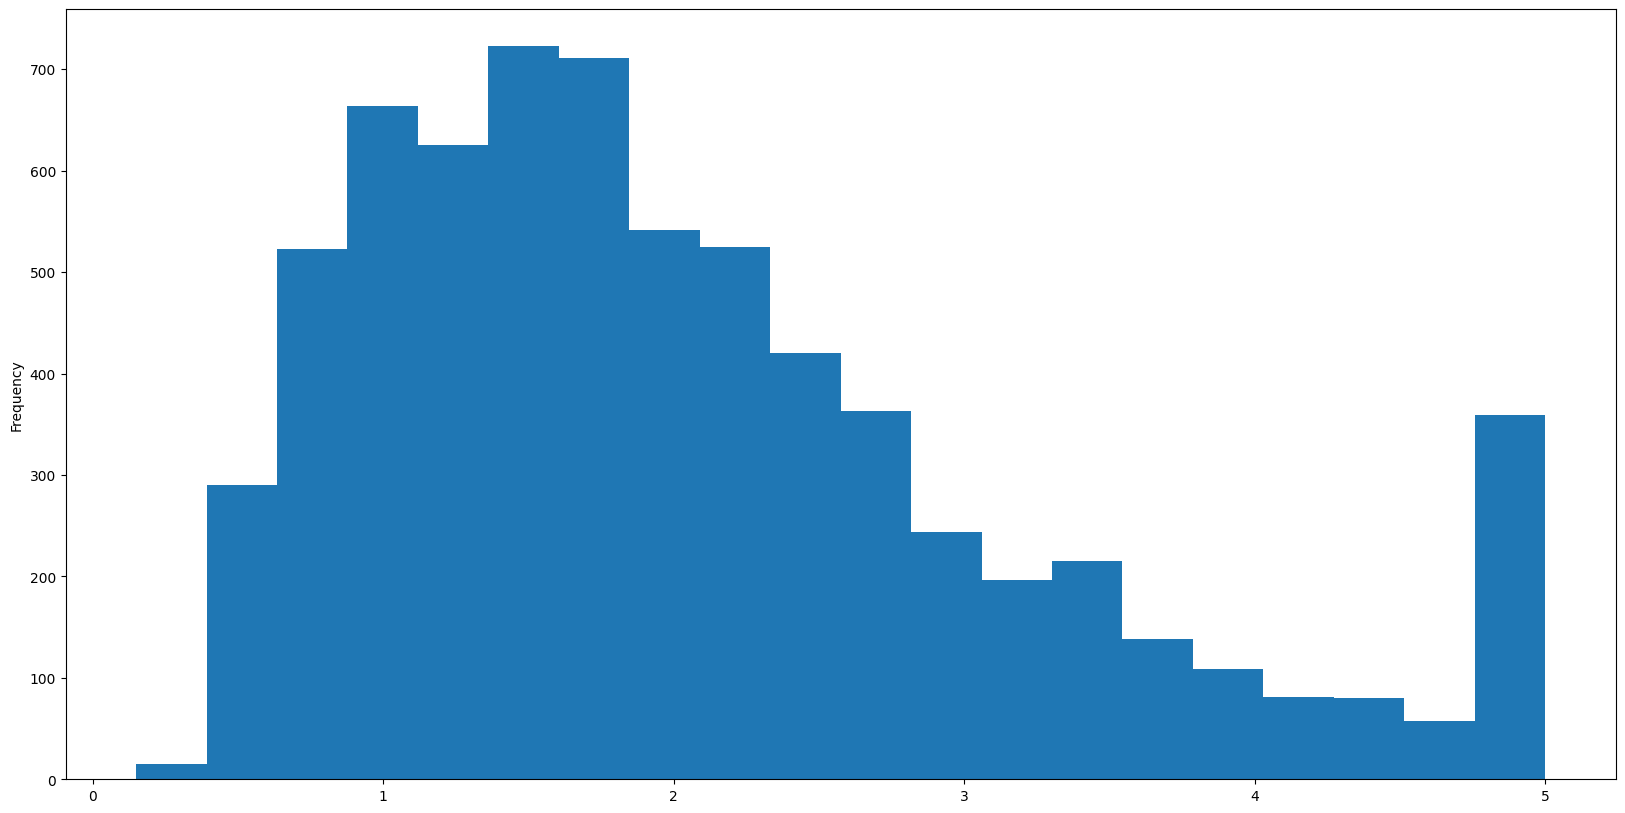

In [10]:
y_test.plot.hist(bins=20)
plt.show()

Normalizam datele folosind `z-score`. Nu uitati, folosim pentru normalizare media si deviatia stanadard calculate *doar* pe setul de antrenare!

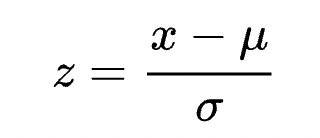

In [11]:
# Calculam media si deviatia standard pentru x si y (folosind doar datele de antrenare)
x_mean_train = x_train.mean()
x_std_train = x_train.std()

y_mean_train = y_train.mean()
y_std_train = y_train.std()

# Folosim valorile de mai sus pentru a normaliza cele doua subseturi de date
x_train_norm = (x_train - x_mean_train) / x_std_train
y_train_norm = (y_train - y_mean_train) / y_std_train

x_test_norm = (x_test - x_mean_train) / x_std_train
y_test_norm = (y_test - y_mean_train) / y_std_train

In [12]:
x_train_norm.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7321 -1.178979  0.749655 -0.848439  -0.114468   -0.238449  0.056343 -0.778500   
1459  0.718758 -0.202955  0.379003  -0.229001   -0.099776 -0.005453  1.086323   
7386 -1.037047  0.114582 -0.383089   0.133023   -0.452128  0.129783 -0.792556   
8582  2.117946  0.749655  0.452562  -0.075482   -0.289907 -0.049123 -0.820669   
5358 -0.095459  0.432119 -0.222598  -0.078677   -0.498353 -0.090017 -0.750387   

      Longitude  
7321   0.700899  
1459  -1.193982  
7386   0.670980  
8582   0.591196  
5358   0.591196

In [13]:
y_train_norm.head()

7321   -0.388890
1459    0.056650
7386   -0.880370
8582    2.344158
5358    2.542666
Name: MedHouseVal, dtype: float64

## Modelare

Incepem prin a folosi un regresor liniar standard din libraria `scikit-learn`.

Pasii pe care trebuie sa ii urmam:
1. Initializam modelul (e.g. `LinearRegression`).
2. Facem 'fitting' folosind datele de antrenare (prin functia `.fit(x_train,y_train)` a modelului).
3. (optional) Printam valorile parametrilor modelului nostru, unde este cazul.
4. Calculam predictiile modelului nostru pe datele de antrenare cu `.predict(x_test)`
5. Folosim o metrica pentru a masura performanta modelului nostru (e.g. mean squared error pentru regresie)

In [14]:
# Initializam Modelul
lin_reg = LinearRegression()

# Ajustam modelul pe datele de antrenare
lin_reg.fit(x_train_norm, y_train_norm)

# Printam coeficientii modelului
print(lin_reg.intercept_, '\n', lin_reg.coef_)

-1.786102475138366e-15 
 [ 7.34147255e-01  1.02979749e-01 -2.59640396e-01  3.01760066e-01
  3.45853991e-05 -3.61680725e-02 -7.75384554e-01 -7.54233672e-01]


In [15]:
# Calculam predictiile modelului pe setul de testare
y_pred = lin_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

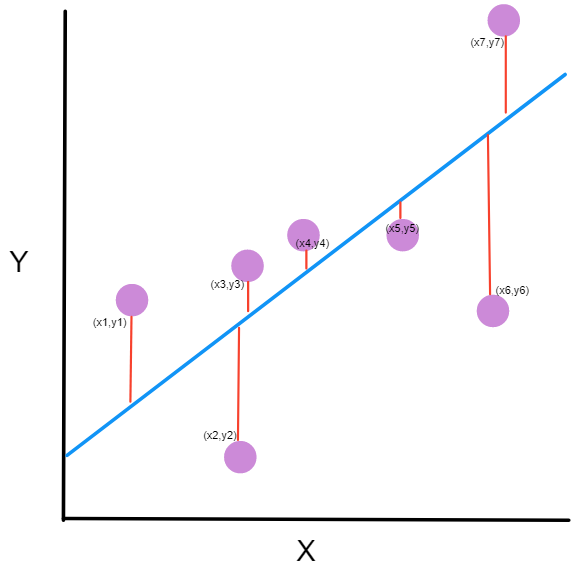

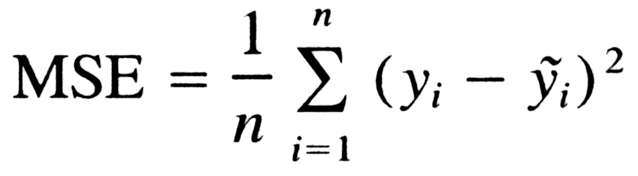

In [16]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_test, y_pred_unnorm))

0.7331995645300223

In [17]:
# Initializam Modelul
sgd_reg = SGDRegressor()

# Ajustam modelul pe datele de antrenare
sgd_reg.fit(x_train_norm, y_train_norm)

# Printam coeficientii modelului
print(sgd_reg.intercept_, '\n', sgd_reg.coef_)

[0.02167768] 
 [ 0.72907046  0.12741856 -0.2977001   0.25379157 -0.01726632 -0.06038088
 -0.77369039 -0.75376947]


In [18]:
# Calculam predictiile modelului pe setul de testare
y_pred = sgd_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [19]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_test, y_pred_unnorm))

0.729705354903754

Ne putem folosi de functia `PolynomialFeatures` ca sa cream un nou set de date `x_poly` adaugand la setul original termenii non-liniari de forma $x^n$.

In [20]:
# Specificam gradul maxim al termenilor nonliniari.
# Degree (grad) = n inseamna ca se vor folosi toti termenii pana la x^n inclusiv termenii de interactiune (e.g. x^2*x^3 data gradul = 5).
poly = PolynomialFeatures(degree=2)
# poly.get_feature_names(['a','b','c'])
x_train_norm_poly = poly.fit_transform(x_train_norm)
x_test_norm_poly = poly.fit_transform(x_test_norm)

In [21]:
# Initializam Modelul
pol_reg = LinearRegression()

# Ajustam modelul pe datele de antrenare
pol_reg.fit(x_train_norm_poly, y_train_norm)

# Printam coeficientii modelului
print(pol_reg.intercept_, '\n', pol_reg.coef_)

-0.1147941440872835 
 [-1.13533180e-15  8.10117315e-01  1.13754202e-01 -3.49614579e-01
  4.83753620e-01  3.81904867e-02 -1.61476194e+00 -1.08933111e+00
 -1.00317474e+00 -1.03940123e-01  3.53301098e-02  1.82332300e-01
 -1.10278436e-01  8.87093107e-02 -9.27555519e-02 -5.68829903e-01
 -4.93313860e-01  3.23589907e-02 -2.31148045e-02  6.27345400e-02
  3.22555910e-02 -2.05262236e-01 -2.31376162e-01 -2.09877936e-01
  7.31099433e-02 -1.30048355e-01 -1.25765892e-01  5.61134904e-01
  4.81125875e-01  4.08906958e-01  5.75375518e-02  2.04175626e-01
 -4.76599245e-01 -4.42461268e-01 -3.65857887e-01  1.45634257e-03
  2.94788321e-01  2.10172587e-02  7.89237340e-03  6.87219385e-03
  4.76691702e-01  3.55242535e-01  2.33219059e-01  3.89674568e-01
  1.44070479e-01]


In [22]:
# Calculam predictiile modelului pe setul de testare
y_pred = pol_reg.predict(x_test_norm_poly)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [23]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_test, y_pred_unnorm))

0.6734043306295348

## Arbori Decizionali

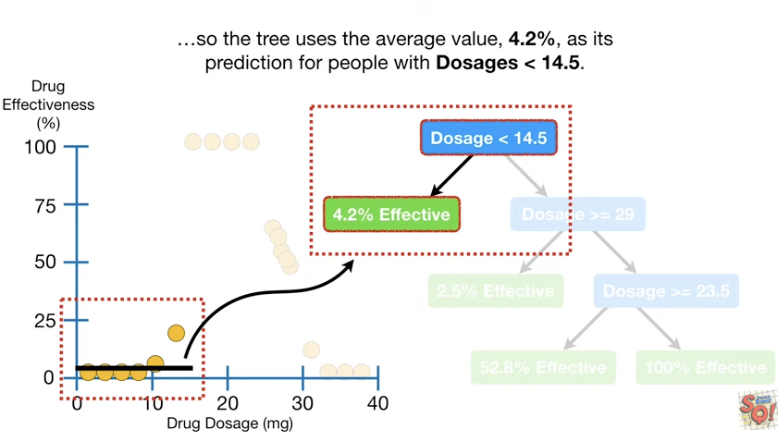

[Sursa!](https://www.youtube.com/watch?v=g9c66TUylZ4)

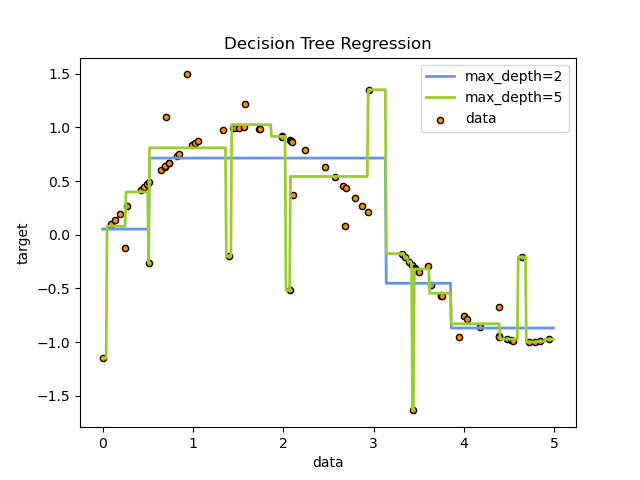

Arbore Decizional Simplu

In [24]:
# Initializam Modelul
dt_reg = DecisionTreeRegressor()

# Ajustam modelul pe datele de antrenare
dt_reg.fit(x_train_norm, y_train_norm)

DecisionTreeRegressor()

In [25]:
# Calculam predictiile modelului pe setul de testare
y_pred = dt_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [26]:
y_pred

array([-1.33197746, -1.33977873,  1.89255045, ...,  0.35483203,
       -0.17305439, -0.659334  ], shape=(6880,))

In [27]:
 # Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_pred_unnorm, y_test))

0.7163809548178243

### Ansambluri de Arbori Decizionali

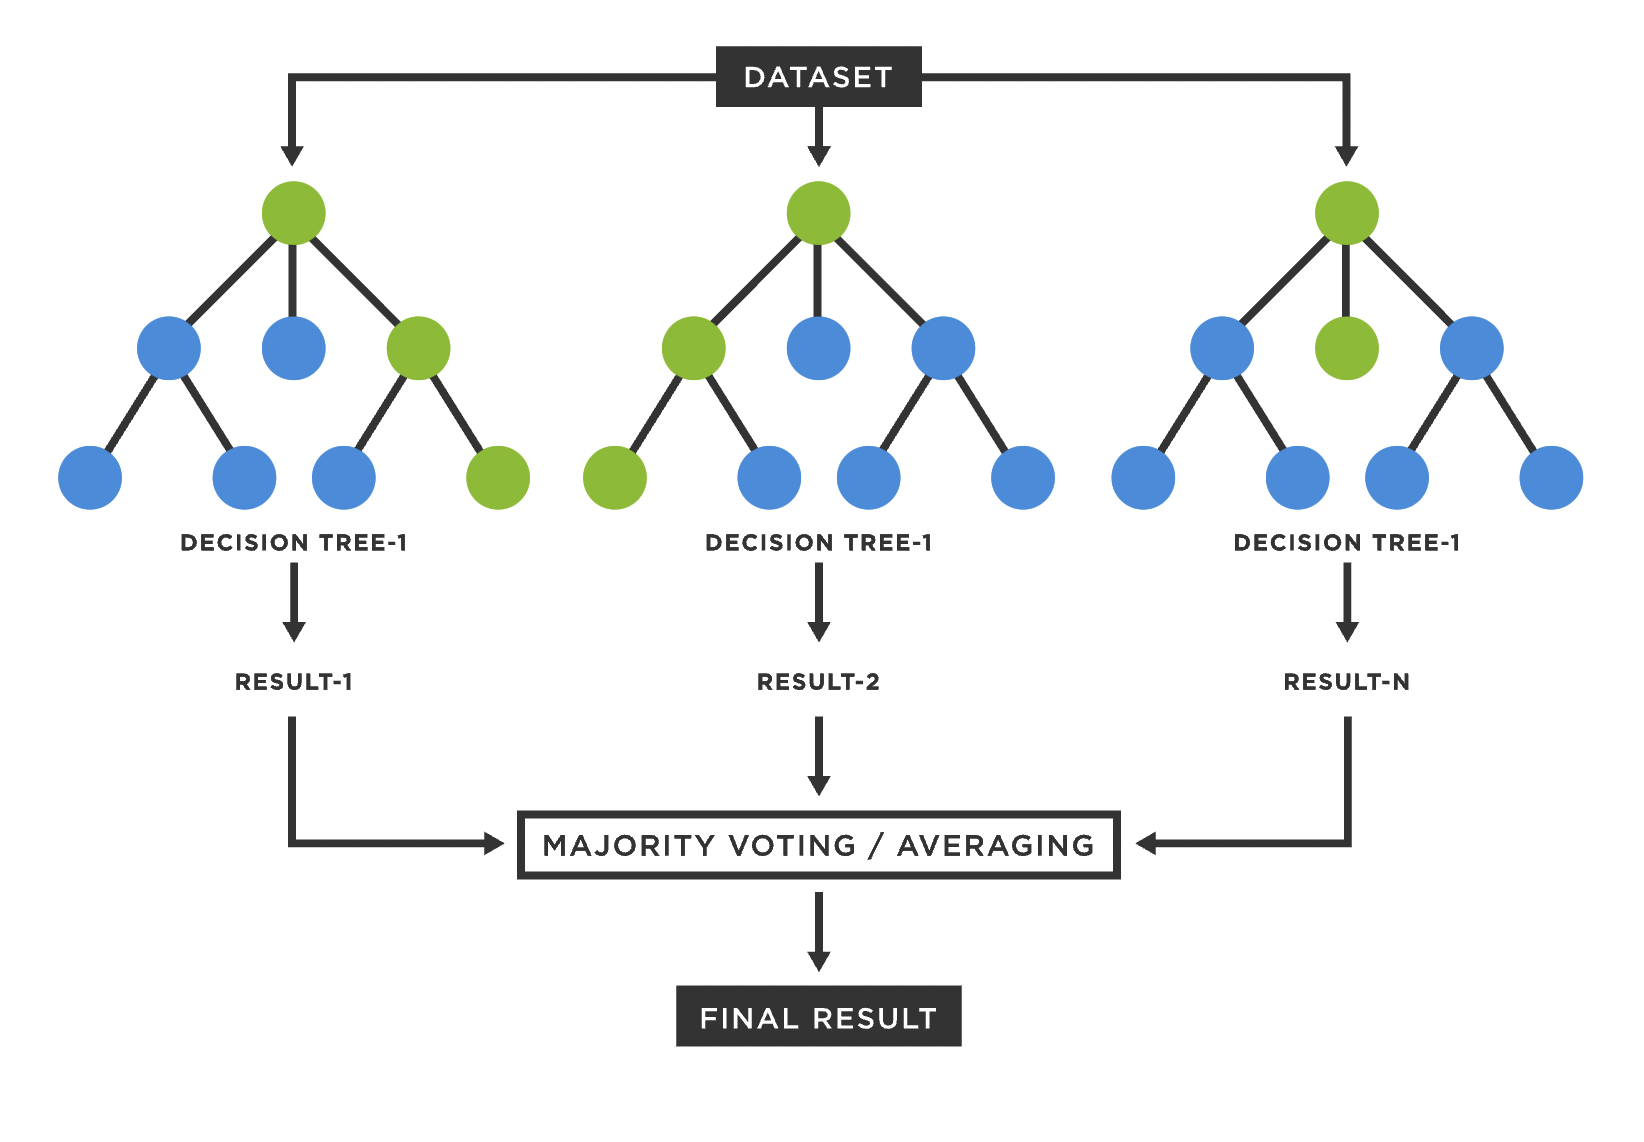

In [28]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

In [29]:
# Initializam Modelul
gb_reg = GradientBoostingRegressor(n_estimators=1000, max_depth=3, criterion='friedman_mse', learning_rate=0.1)

# Ajustam modelul pe datele de antrenare
gb_reg.fit(x_train_norm, y_train_norm)

GradientBoostingRegressor(n_estimators=1000)

In [30]:
# Calculam predictiile modelului pe setul de testare
y_pred = gb_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [31]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_pred_unnorm, y_test))

0.4769693910325905

Am obtinut o performanta mult mai buna (eroare mai mica) folosind un ansamblu de arbori decizionali.

In [32]:
# Initializam Modelul
rf_reg = RandomForestRegressor(n_estimators=100)

# Ajustam modelul pe datele de antrenare
rf_reg.fit(x_train_norm, y_train_norm)

RandomForestRegressor()

In [33]:
# Calculam predictiile modelului pe setul de testare
y_pred = rf_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [34]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_pred_unnorm, y_test))

0.5095605308999959